<a href="https://colab.research.google.com/github/junawaneshivani/Deep-Learning/blob/master/Tensorflow_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started with tensorflow

We will be using the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset with 60k train and 10k test images as our toy data containing handwritten digits 0 to 9. 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
# 28x28 imaages of handwritten digits 0-9
mnist = tf.keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test: (10000, 28, 28)
Y_test: (10000,)


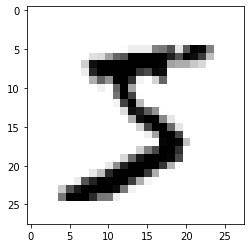

In [3]:
import matplotlib.pyplot as plt

#print(X_train[0])
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [0]:
# Normalizing the input data for faster optimization algorithm
# scales values between 0's and 1's
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
# Creating our model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2605 - accuracy: 0.9237
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9768


In [6]:
# Testing accuracy
loss, accuracy = model.evaluate(x=X_test, y=Y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

(10000, 28, 28) (10000,)
313/313 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9725
Loss: 0.09338176250457764
Accuracy: 0.9725000262260437


In [10]:
# Saving your model
model.save("my_first_model.model")

INFO:tensorflow:Assets written to: my_first_model.model/assets


In [0]:
# loading your model
new_model = tf.keras.models.load_model("my_first_model.model")

In [13]:
predictions = new_model.predict(X_test)
print(predictions[0])

[3.85853038e-09 1.83244808e-07 3.26677909e-05 5.62961912e-04
 2.69900352e-11 1.67088643e-07 1.69324207e-14 9.99403834e-01
 1.41723007e-07 1.10408315e-07]


In [14]:
import numpy as np
print(np.argmax(predictions[0]))

7


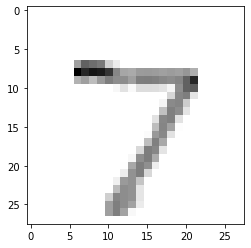

In [19]:
plt.imshow(X_test[0], cmap=plt.cm.binary)